In [1]:
import numpy as np
import pandas as pd
import altair as alt
import plotly.express as px
import osmnx as ox
import geopandas as gpd

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
clean = pd.read_csv('../data/clean/clean_meteorite_landings.csv')

In [3]:
clean.describe()

,id,mass,year,reclat,reclong
count,31705.000000,3.170500e+04,31705.000000,31705.000000,31705.000000
mean,20751.653272,1.867359e+04,1987.087084,-47.602009,73.452607
std,14974.205352,6.892699e+05,26.791228,46.714171,83.419083
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,9190.000000,6.530000e+00,1983.000000,-79.683330,26.000000
50%,18511.000000,3.007000e+01,1991.000000,-72.000000,57.147030
75%,27300.000000,2.050000e+02,2000.000000,18.393170,159.414820
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


In [4]:
alt.Chart(clean).mark_circle(opacity=0.5).encode(
    alt.X('reclat'),
    alt.Y('reclong'),
    size='mass'
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [5]:
alt.Chart(clean.groupby(by='year').agg({'id': 'count'}).reset_index()).mark_bar().encode(
    alt.Y('id', title='Count'),
    alt.X('year')
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [6]:
alt.Chart(clean).mark_line().encode(
    alt.X('year'),
    alt.Y('mass')
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [7]:
alt.Chart(clean.groupby(by=['year', 'fall', 'nametype']).agg({'id': 'count'}).reset_index()).mark_line().encode(
    alt.Y('id'),
    alt.X('year'),
    color='fall'
).facet('nametype')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [8]:
fig = px.scatter_geo(clean, lat='reclat', lon='reclong', size='mass')
fig.show()

<Axes: >

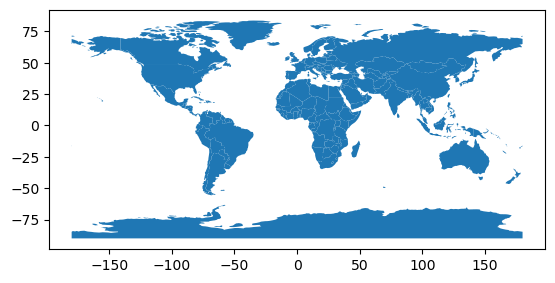

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs('EPSG:3347')
world.plot()

<Axes: >

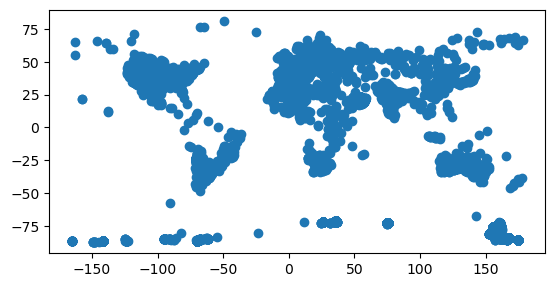

In [10]:
clean = gpd.GeoDataFrame(clean, crs='EPSG:4326', geometry=gpd.points_from_xy(clean['reclong'], clean['reclat']))
# clean = clean.drop(columns='GeoLocation')
clean.plot()

In [11]:
px.scatter_mapbox(clean, lat='reclat', lon='reclong', mapbox_style='open-street-map', zoom=2, size='mass')

In [18]:
test = gpd.sjoin(world, clean, how='inner', predicate='contains')

In [21]:
test.groupby('continent').agg('count')

,pop_est,name_left,iso_a3,gdp_md_est,geometry,index_right,name_right,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
continent,,,,,,,,,,,,,,,,
Africa,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596
Antarctica,22097,22097,22097,22097,22097,22097,22097,22097,22097,22097,22097,22097,22097,22097,22097,22097
Asia,3437,3437,3437,3437,3437,3437,3437,3437,3437,3437,3437,3437,3437,3437,3437,3437
Europe,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548
North America,1808,1808,1808,1808,1808,1808,1808,1808,1808,1808,1808,1808,1808,1808,1808,1808
Oceania,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639
South America,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490


In [23]:
px.bar(clean.groupby('year').agg({'id': 'count'}).reset_index(),
                        x='year',
                        y='id', color='blue')